In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('../Data/insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


Coverting categorical columns to dummy variables

In [4]:
def cat2col(data,col):
    dummy=pd.get_dummies(data[col],drop_first=True)
    data.drop(col, axis=1,inplace=True)
    data= pd.concat([data,dummy],axis =1)
    return data

In [5]:
for i in df.columns:
    if df[i].dtype ==object:
        print(i)
        df =cat2col(df,i)

sex
smoker
region


In [6]:
df.head()

,age,bmi,children,expenses,male,yes,northwest,southeast,southwest
0,19,27.9,0,16884.92,0,1,0,0,1
1,18,33.8,1,1725.55,1,0,0,1,0
2,28,33.0,3,4449.46,1,0,0,1,0
3,33,22.7,0,21984.47,1,0,1,0,0
4,32,28.9,0,3866.86,1,0,1,0,0


Test train split

In [7]:
X=df.drop('expenses',axis=1)
y=df.expenses

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=12)

Model fitting

In [9]:
scores=[]
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error

In [10]:
from sklearn.linear_model import LinearRegression

model_lr=LinearRegression()
model_lr.fit(X_train,y_train)
pred_lr=model_lr.predict(X_test)

In [11]:
scores.append({
        'model': 'Linear Regression',
        'r2_score': r2_score(y_test, pred_lr)*100,
    'MS_score' : mean_squared_error(y_test,pred_lr)
    })

pred=pred_lr

print('Testing R2 Score: ', r2_score(y_test, pred_lr)*100,
      '\nTesting mean squared: ', mean_squared_error(y_test,pred_lr))

Testing R2 Score:  70.99717048857268 
Testing mean squared:  41767384.48798242


Visualiztion of the Linear Regression Model

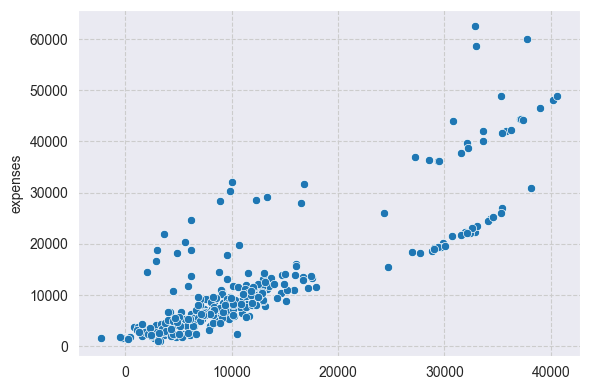

In [12]:
plt.figure(figsize=(6,4))
sns.set_style(style='darkgrid', rc={"grid.color": ".8", "grid.linestyle": "--"})
sns.scatterplot(x=pred,y=y_test)
plt.tight_layout()
plt.grid(True)
plt.show()